In [4]:
SAMPLE_RATE = 22050       # samples per second
CLIP_DURATION = 10.0      # seconds
N_FFT = 2048              # FFT window size
HOP_LENGTH = 512          # hop between windows
N_MELS = 128

Loaded shape: (220500,) Sample rate: 22050


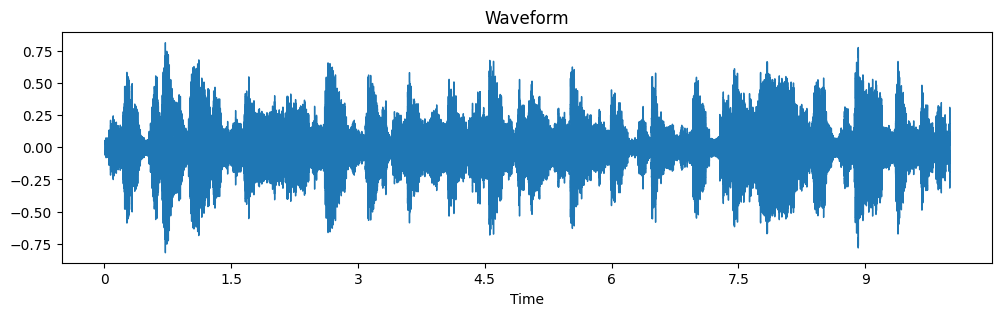

In [ ]:
import librosa, librosa.display, matplotlib.pyplot as plt


path = "/Users/anish/Desktop/music-vibe/data/genres_original/blues/blues.00000.wav"  
y, sr = librosa.load(path, sr=SAMPLE_RATE, mono=True, duration=CLIP_DURATION)
print("Loaded shape:", y.shape, "Sample rate:", sr)

plt.figure(figsize=(12, 3))
librosa.display.waveshow(y, sr=sr)
plt.title("Waveform")
plt.show()


Mel shape: (128, 431)


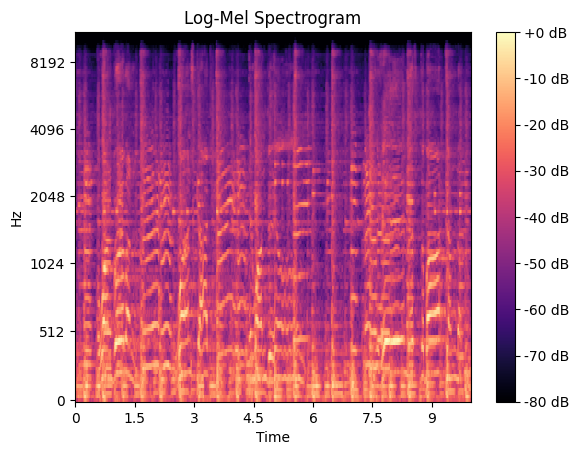

In [3]:
import numpy as np

mel = librosa.feature.melspectrogram(
    y=y, sr=sr, n_fft=N_FFT, hop_length=HOP_LENGTH, n_mels=N_MELS
)
mel_db = librosa.power_to_db(mel, ref=np.max)

print("Mel shape:", mel_db.shape)
librosa.display.specshow(mel_db, sr=sr, hop_length=HOP_LENGTH, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Log-Mel Spectrogram")
plt.show()


In [4]:
mean = mel_db.mean()
std = mel_db.std()
mel_norm = (mel_db - mean) / std

print("Mean:", mel_norm.mean(), "Std:", mel_norm.std())


Mean: 1.9471773e-07 Std: 1.0


In [1]:
import os

# make main mels folder
os.makedirs("data/mels", exist_ok=True)

# make subfolders for each genre
genres = ["blues", "classical", "country", "disco", "hiphop", "jazz",
          "metal", "pop", "reggae", "rock"]

for g in genres:
    os.makedirs(f"data/mels/{g}", exist_ok=True)

print("✅ All mels folders created!")



✅ All mels folders created!


In [2]:
import pandas as pd

data = [
    {
        "filepath": "data/genres_original/blues/blues.00000.wav",
        "mel_path": "data/mels/blues/blues.00000.npy",
        "genre": "blues",
        "tempo_bpm": 120.0,
        "spectral_centroid_mean": 2500.0,
        "duration_seconds": 10.0,
        "sr": 22050,
        "n_mels": 128
    }
]

df = pd.DataFrame(data)
df.to_csv("data/manifest_with_mels.csv", index=False)
print("✅ Manifest created and saved!")
print(df)


✅ Manifest created and saved!
                                     filepath  \
0  data/genres_original/blues/blues.00000.wav   

                          mel_path  genre  tempo_bpm  spectral_centroid_mean  \
0  data/mels/blues/blues.00000.npy  blues      120.0                  2500.0   

   duration_seconds     sr  n_mels  
0              10.0  22050     128  


In [3]:
import pandas as pd
df = pd.read_csv("data/manifest_with_mels.csv")
print(df.head())


                                     filepath  \
0  data/genres_original/blues/blues.00000.wav   

                          mel_path  genre  tempo_bpm  spectral_centroid_mean  \
0  data/mels/blues/blues.00000.npy  blues      120.0                  2500.0   

   duration_seconds     sr  n_mels  
0              10.0  22050     128  
